In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
from ml_recon.utils import ifft_2d_img, image_slices

In [2]:
sense = np.load('sens2.npy')

In [3]:
sense.shape

(32, 1, 256, 256)

In [4]:
vec = sense.reshape(32, -1)

In [5]:
U, s, Vh= np.linalg.svd(vec, full_matrices=False)

In [6]:
sense_10 = Vh[:10, ].reshape(10, 256, 256) * s[:10, None, None]

In [7]:
phase_coeff = np.zeros_like(sense_10)
phase_coeff[:, 127:129, 127:129] = 100 * (np.random.rand(10, 2, 2) - 0.5) + 1j * ((np.random.rand(10, 2, 2) - 0.5)* 100)
imgs = ifft_2d_img(torch.from_numpy(phase_coeff))


In [8]:
imgs = imgs.abs()

In [9]:
# scale iamges to around -pi to pi
imgs = (imgs - imgs.abs().max()/2) * 5

In [10]:
sense_10 = np.abs(sense_10) * np.exp(1j * imgs.numpy())


(<Figure size 1000x1000 with 12 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >]], dtype=object))

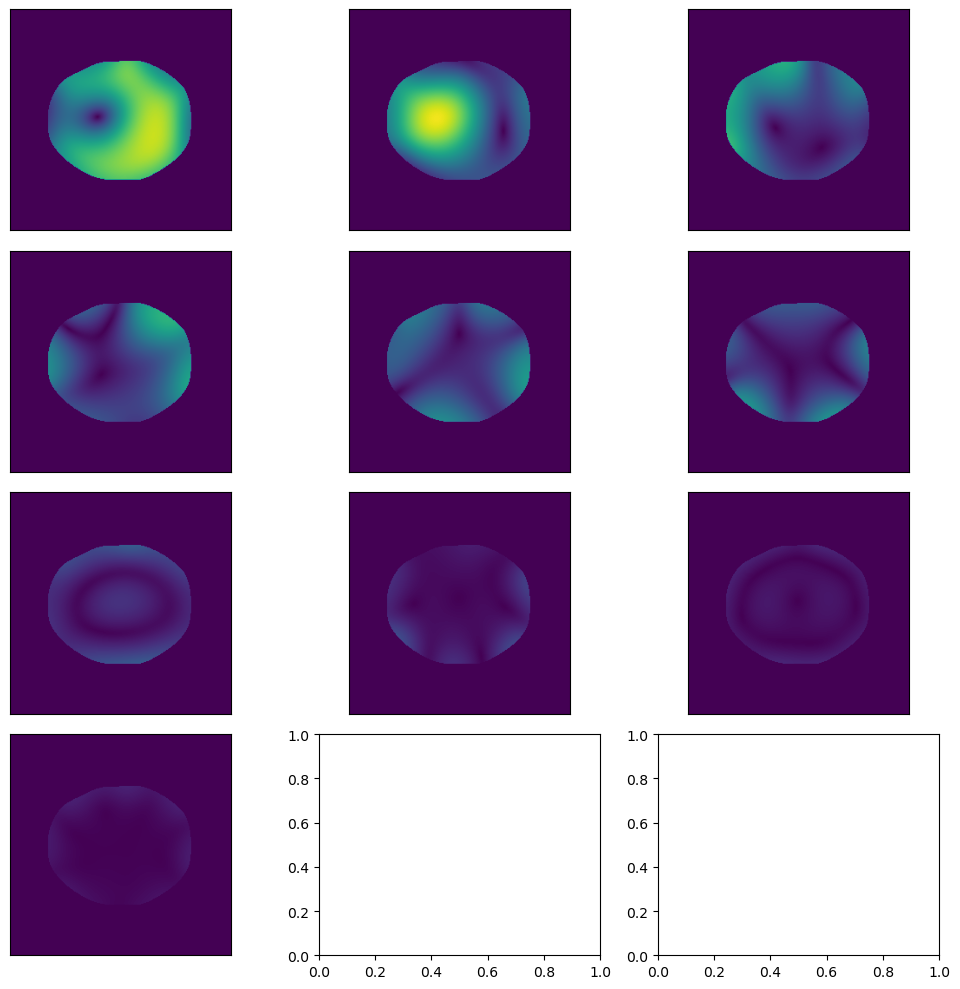

In [11]:
image_slices(np.abs(sense_10), vmax=1)

(<Figure size 1000x1000 with 12 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >]], dtype=object))

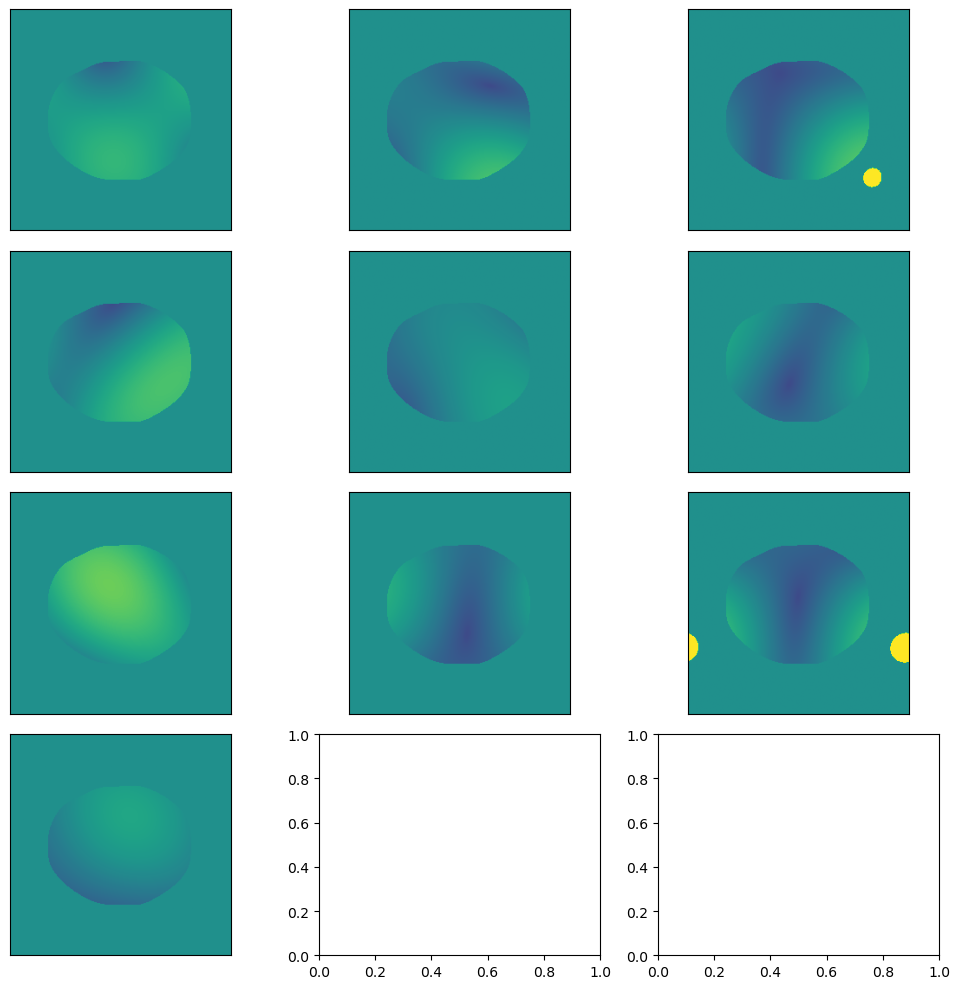

In [12]:
image_slices(np.angle(sense_10), vmin=-np.pi, vmax=np.pi)

In [13]:
np.save('coil_compressed_10.npy', sense_10)